<a href="https://colab.research.google.com/github/bhaveshwadhwani/CreditRiskModelling/blob/master/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://assets.datacamp.com/production/repositories/4876/datasets/a2d8510b4aec8d0ac14ab9bee61ba3c085805967/cr_loan2.csv

--2019-12-26 04:30:38--  https://assets.datacamp.com/production/repositories/4876/datasets/a2d8510b4aec8d0ac14ab9bee61ba3c085805967/cr_loan2.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 54.240.168.3, 54.240.168.97, 54.240.168.76, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.240.168.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1740274 (1.7M) [application/vnd.ms-excel]
Saving to: ‘cr_loan2.csv’

cr_loan2.csv        100%[===================>]   1.66M  3.30MB/s    in 0.5s    

2019-12-26 04:30:39 (3.30 MB/s) - ‘cr_loan2.csv’ saved [1740274/1740274]



We begin by looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix


In [0]:
#Load the data
cr_loan = pd.read_csv("cr_loan2.csv")

In [0]:
# Check the structure of the data
print(cr_loan.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [0]:
# Check the first five rows of the data
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Text(0.5, 0, 'Loan Amount')

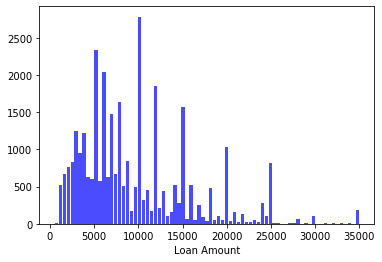

In [0]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")

Text(0, 0.5, 'Persone Age')

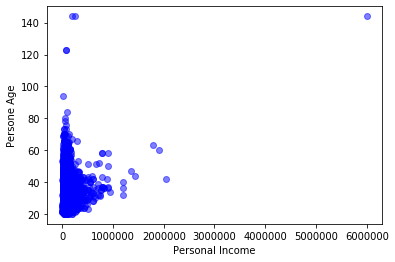

In [0]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')

#### We can see there are few outliers in above data like age 120 and 140

### Crosstab and pivot tables

In [0]:
# Create a cross table of the loan intent and loan status
loan_intent_status = pd.crosstab(cr_loan["loan_intent"], cr_loan["loan_status"])
loan_intent_status

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3722,1490
EDUCATION,5342,1111
HOMEIMPROVEMENT,2664,941
MEDICAL,4450,1621
PERSONAL,4423,1098
VENTURE,4872,847


In [0]:
loan_intent_status

Index(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE', 'All'],
      dtype='object', name='loan_intent')

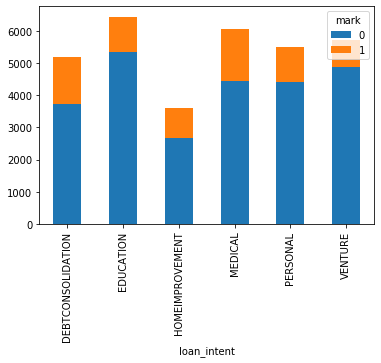

In [0]:
loan_intent_status.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.412126,28.587874
EDUCATION,82.783202,17.216798
HOMEIMPROVEMENT,73.897365,26.102635
MEDICAL,73.299292,26.700708
PERSONAL,80.112298,19.887702
VENTURE,85.189718,14.810282


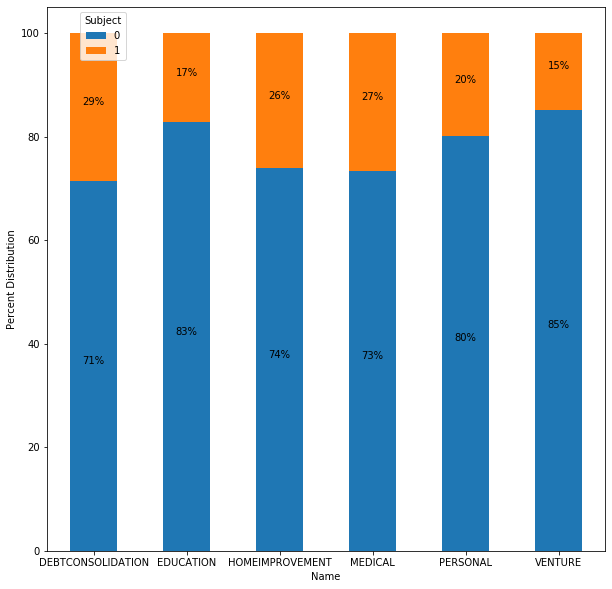

In [0]:
#crosstab
ax= pd.crosstab(cr_loan["loan_intent"], cr_loan["loan_status"]).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0),title="Subject",)

plt.xlabel('Name')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2, "{:.0f}%".format(height),
           ha = 'center', va='bottom')


plt.show()

<BarContainer object of 2 artists>

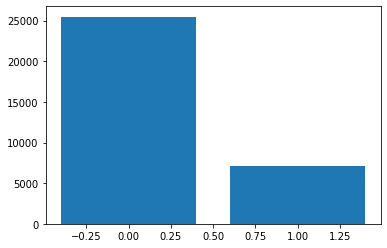

In [0]:
plt.bar(cr_loan.loan_status.value_counts().index,cr_loan.loan_status.value_counts())

In [0]:
cr_loan.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [0]:
print("Percent of default loans: ",round(cr_loan.loan_status.value_counts()[1]/np.sum(cr_loan.loan_status.value_counts())*100,2),"%") 

Percent of default loans:  21.82 %


In [37]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan.loan_status,cr_loan.person_home_ownership,
        values=cr_loan.person_emp_length, aggfunc=max))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [40]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan.loan_status,cr_loan.person_home_ownership,
        values=cr_loan.person_emp_length, aggfunc=np.mean))

person_home_ownership  MORTGAGE     OTHER       OWN      RENT
loan_status                                                  
0                      5.902120  3.945946  5.316986  3.939440
1                      5.755828  3.090909  3.161677  3.649119


In [41]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan.loan_status,cr_loan.person_home_ownership,
        values=cr_loan.person_emp_length, aggfunc=np.median))

person_home_ownership  MORTGAGE  OTHER  OWN  RENT
loan_status                                      
0                           5.0    3.0  5.0   3.0
1                           5.0    2.0  2.0   3.0


### It may not be possible for a person to have an employment length of less than 0 or greater than 60.

In [0]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [44]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan_new.loan_status,cr_loan_new.person_home_ownership,
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

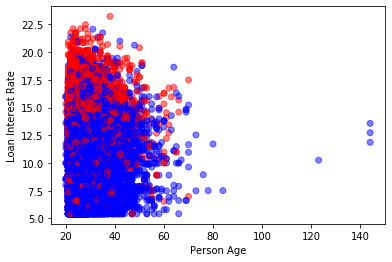

In [48]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan['person_age'], cr_loan['loan_int_rate'],
            c = cr_loan['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

### Removing outliers from above seen data


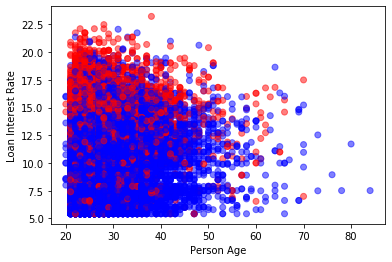

In [47]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

### Replacing missing credit data

In [55]:
# Print a null value column array
cr_loan.columns[cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [56]:
# Print the top five rows with nulls for employment length
cr_loan[cr_loan["person_emp_length"].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [0]:
# Impute the null values with the median value for all employment lengths
cr_loan["person_emp_length"].fillna((cr_loan['person_emp_length'].median()), inplace=True)

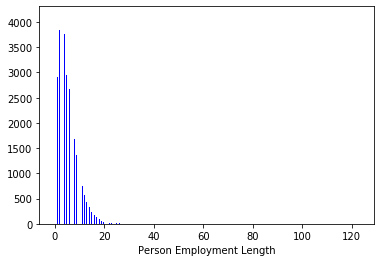

In [58]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan["person_emp_length"], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [59]:
# Print the number of nulls
print(cr_loan["loan_int_rate"].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan["loan_int_rate"].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


### One hot encoding

In [60]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num,cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [61]:
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [0]:
# Create the X and y data sets
X = cr_loan_prep.drop("loan_status",axis=1)
y = cr_loan_clean[["loan_status"]]
# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

### Predicting probability of default

In [69]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.129805
1            0      0.243161
2            0      0.100325
3            0      0.252148
4            0      0.377654


### Default classification reporting


In [72]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df["loan_status"].value_counts())


# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df["loan_status"], target_names=target_names))

0    11219
1      567
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9194
     Default       0.73      0.16      0.26      2592

    accuracy                           0.80     11786
   macro avg       0.77      0.57      0.57     11786
weighted avg       0.79      0.80      0.75     11786



In [75]:
# Import function
from sklearn.metrics import precision_recall_fscore_support
# Select all non-averaged values from the report
precision_recall_fscore_support(y_test,preds_df["loan_status"])

(array([0.80577592, 0.72839506]),
 array([0.98324995, 0.15933642]),
 array([0.88571009, 0.26147515]),
 array([9194, 2592]))

### Visually scoring credit models

Accuracy of model 0.8020532835567623


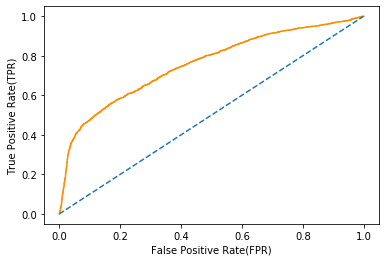

AUC of model is : 0.7568318173151034


In [80]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print("Accuracy of model",clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
print("AUC of model is :",auc)

#### The accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

## Confusion Matrix

![img](https://assets.datacamp.com/production/repositories/4876/datasets/01ce16bcd7a7a76c1fa0cb6c0ef22647845419a5/3_9_conf_ex2.PNG)

In [82]:
# Set the threshold for defaults to 0.4
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df["loan_status"]))

[[8489  705]
 [1428 1164]]


In [0]:
avg_loan_amnt = np.mean(cr_loan_prep["loan_amnt"])

In [88]:
# Reassign the values of loan status based on the new threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df["loan_status"].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9869225.157201577


By our estimates, this loss would be around $9.8 million. That seems like a lot! We can try rerunning this code with threshold values of 0.3 and 0.5. Do you see the estimated losses changing? How do we find a good threshold value based on these metrics alone?

In [89]:
# Reassign the values of loan status based on the new threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.3 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df["loan_status"].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

14037376.179182043


In [90]:
# Reassign the values of loan status based on the new threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.5 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df["loan_status"].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df["loan_status"])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

4568628.424083659


In [91]:
default_recall

0.15933641975308643

### Trees


In [92]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.088257
1            0      0.007205
2            0      0.024410
3            0      0.095778
4            0      0.226402


![img](https://assets.datacamp.com/production/repositories/4876/datasets/0dd41a0ed2e9e8bbe1b91a0c3df4935e327c9206/3_3_formula.PNG)


In [2]: print(portfolio.head())
  

```
   gbt_prob_default  lr_prob_default  lgd  loan_amnt
0          0.940435         0.445779  0.2      15000
1          0.922014         0.223447  0.2      11200
2          0.021707         0.288558  0.2      15000
3          0.026483         0.169358  0.2      10800
4          0.064803         0.114182  0.2       3000
```



In [0]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio["lr_expected_loss"] = portfolio["lr_prob_default"] * portfolio["lgd"] * portfolio["loan_amnt"]
portfolio["gbt_expected_loss"] = portfolio["gbt_prob_default"] * portfolio["lgd"] * portfolio["loan_amnt"]

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio["lr_expected_loss"]))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio["gbt_expected_loss"]))

LR expected loss:  5596776.979852879

GBT expected loss:  5447712.9423716515

Great! It looks like the total expected loss for the XGBClassifier() model is quite a bit lower. When we talk about accuracy and precision, the goal is to generate models which have a low expected loss. Looking at a classification_report() helps as well.


In [93]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 1 0 1]
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9194
     Default       0.95      0.70      0.81      2592

    accuracy                           0.93     11786
   macro avg       0.94      0.85      0.88     11786
weighted avg       0.93      0.93      0.92     11786



In [94]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 62, 'loan_int_rate': 110, 'person_income': 123, 'person_emp_length': 23, 'person_home_ownership_RENT': 51, 'loan_grade_C': 9, 'loan_intent_DEBTCONSOLIDATION': 26, 'loan_grade_D': 33, 'loan_intent_MEDICAL': 28, 'person_home_ownership_OWN': 42, 'loan_intent_HOMEIMPROVEMENT': 25, 'loan_intent_VENTURE': 20, 'loan_grade_E': 17, 'loan_intent_EDUCATION': 6, 'cb_person_cred_hist_length': 1, 'person_home_ownership_OTHER': 4, 'loan_grade_G': 14, 'loan_amnt': 9, 'cb_person_default_on_file_N': 1, 'person_home_ownership_MORTGAGE': 2, 'person_age': 4, 'loan_grade_F': 1}


In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

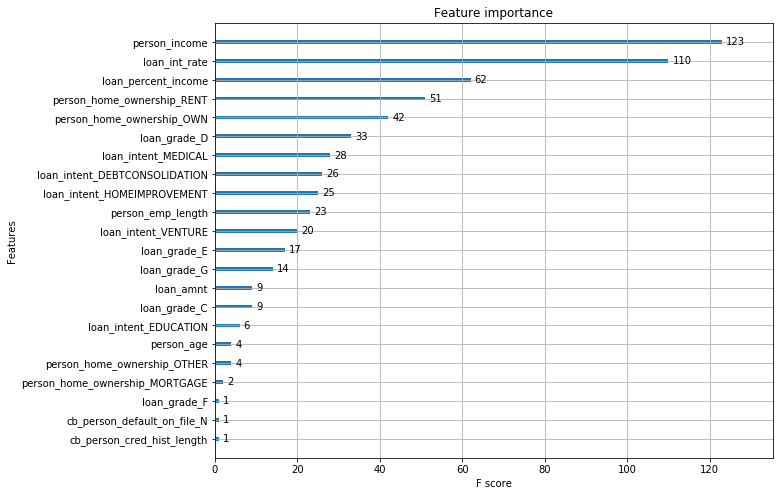

In [104]:

# Train model
clf_gbt2 = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
# plt.figure(figsize=(50,30))
plt.show()

### Cross validating credit models

In [106]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.895947       0.002251       0.891604      0.009428
1        0.902931       0.003206       0.897648      0.008133
2        0.911380       0.001820       0.905553      0.007240
3        0.915385       0.000750       0.908138      0.008153
4        0.920330       0.001100       0.912328      0.006981


In [0]:
# Create the data frame of cross validations
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=n_folds)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.895947       0.002251       0.891604      0.009428
1        0.902931       0.003206       0.897648      0.008133
2        0.911380       0.001820       0.905553      0.007240
3        0.915385       0.000750       0.908138      0.008153
4        0.920330       0.001100       0.912328      0.006981


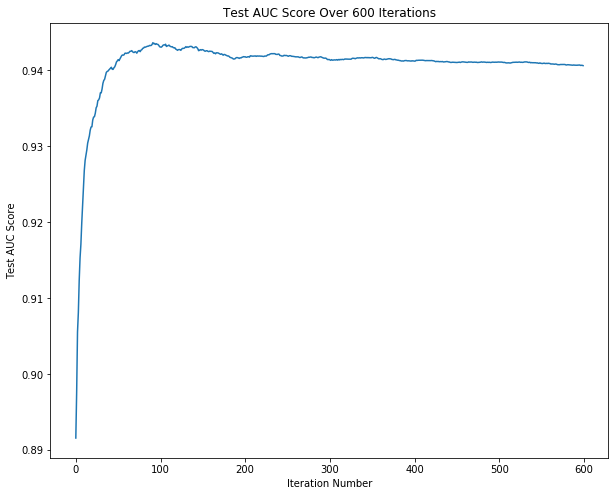

In [112]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
# print(np.mean(cv_results_big["test-auc-mean"]).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big["test-auc-mean"])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [115]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.93574661 0.92986425 0.93506787 0.92984838]
Average accuracy: 0.93 (+/- 0.01)


Our average cv_score for this course is getting higher! With only a couple of hyperparameters and cross-validation, we can get the average accuracy up to 93%. This is a great way to validate how robust the model is

### Solving class imbalance problem

#### Undersampling training data


In [0]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [117]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under["loan_status"].value_counts())

1    3872
0    3872
Name: loan_status, dtype: int64


In [118]:
X_y_train_under.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y', 'loan_status'],
      dtype='object')

### Some metrics compared on older model and newer undersampled data



```
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

output:
                  precision    recall  f1-score   support
    
     Non-Default       0.93      0.99      0.96      9198
         Default       0.95      0.73      0.83      2586
    
       micro avg       0.93      0.93      0.93     11784
       macro avg       0.94      0.86      0.89     11784
    weighted avg       0.93      0.93      0.93     11784
    
                  precision    recall  f1-score   support
    
     Non-Default       0.95      0.91      0.93      9198
         Default       0.72      0.84      0.77      2586
    
       micro avg       0.89      0.89      0.89     11784
       macro avg       0.83      0.87      0.85     11784
    weighted avg       0.90      0.89      0.89     11784
    
    
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

Output:    
    [[9105   93]
     [ 691 1895]]
    [[8338  860]
     [ 426 2160]]
     
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

Output:   
      0.8613405315086655
      0.870884117348218
```



In [0]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])



```
              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

   micro avg       0.82      0.82      0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.73      0.82      2586

   micro avg       0.93      0.93      0.93     11784
   macro avg       0.93      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

0.7108943782814463
0.8909014142736051
```



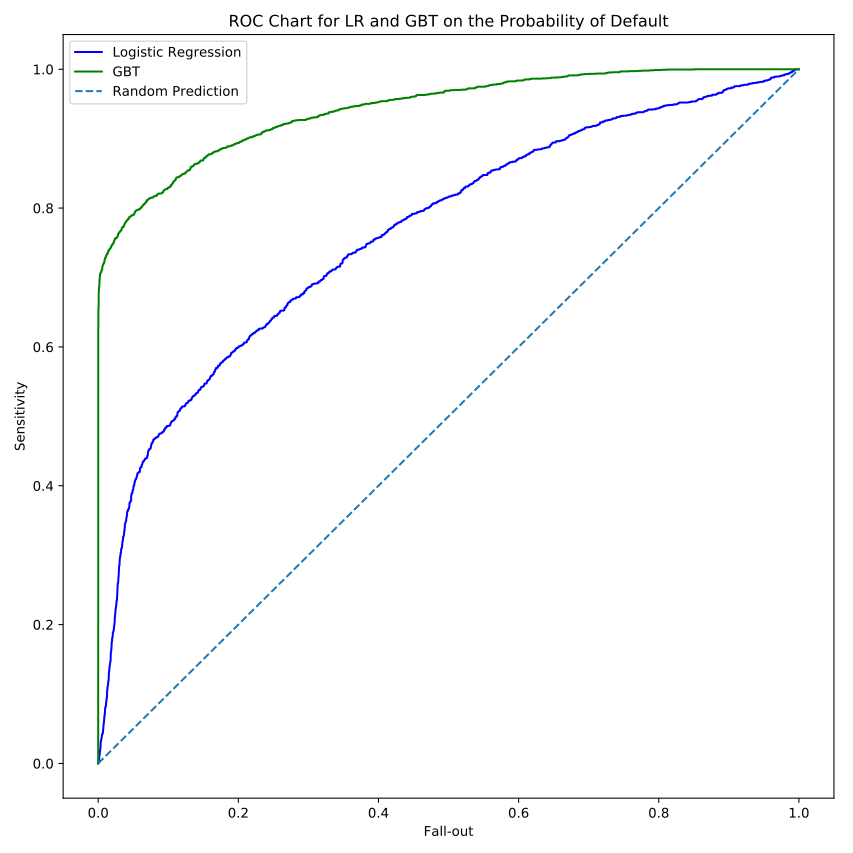

In [121]:
from IPython.display import Image
Image(filename='plot.png')

In [0]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % "Gradient Boosted tree")
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [0]:

from IPython.display import SVG, display
# Image(filename='calibrated_plot.svg')
display(filename='calibrated_plot.svg')

### Acceptance rates

Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept. For this exercise, assume the test data is a fresh batch of new loans.

In [127]:
preds_df.columns
test_pred_df = pd.concat()

Index(['prob_default'], dtype='object')

In [0]:
# Check the statistics of the probabilities of default
print(preds_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())



```
 output:
    count    11784.000000
    mean         0.216866
    std          0.333038
    min          0.000354
    25%          0.022246
    50%          0.065633
    75%          0.177804
    max          0.999557
    Name: prob_default, dtype: float64
    0    10016
    1     1768
    Name: pred_loan_status, dtype: int64
```



In [0]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

![img](https://im7.ezgif.com/tmp/ezgif-7-91bf57b5a3c0.png)

In [0]:
# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())



```
   true_loan_status  prob_default  pred_loan_status
0                 1      0.982387                 1
1                 1      0.975163                 1
2                 0      0.003474                 0
3                 0      0.005457                 0
4                 1      0.119876                 0
0.08256789137380191
```



In [0]:
# Print the statistics of the loan amount column
print(test_pred_df["loan_amnt"].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df["loan_amnt"])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df.true_loan_status,
                 test_pred_df.pred_loan_status_15).apply(lambda x: x * avg_loan, axis = 0))



```
count    11784.000000
mean      9556.283944
std       6238.005674
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
pred_loan_status_15              0              1
true_loan_status                                 
0                   $87,812,693.16     $86,006.56
1                    $7,903,046.82 $16,809,503.46
```



Nice! With this, we can see that our bad rate of about 8% represents an estimated loan value of about 7.9 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! With this, we are ready to start talking about our acceptance strategy going forward

## Strategy Table


```
Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  Estimated Value
0              1.00      1.000     0.219               11379        9556.28      61112391.49
1              0.95      0.992     0.179               10591        9556.28      64977180.47
2              0.90      0.976     0.132               10025        9556.28      70510056.35
3              0.85      0.804     0.083                9390        9556.28      74837713.31
4              0.80      0.254     0.061                8857        9556.28      74313895.38
5              0.75      0.178     0.052                8229        9556.28      70460210.80
6              0.70      0.138     0.043                7685        9556.28      67124170.79
7              0.65      0.111     0.036                7104        9556.28      62999890.58
8              0.60      0.093     0.030                6456        9556.28      57993623.06
9              0.55      0.078     0.027                5870        9556.28      53066213.97
10             0.50      0.066     0.023                5288        9556.28      48209062.64
11             0.45      0.055     0.020                4726        9556.28      43356460.11
12             0.40      0.045     0.017                4131        9556.28      38134774.93
13             0.35      0.037     0.014                3536        9556.28      32844857.91
14             0.30      0.030     0.010                2941        9556.28      27542919.09
15             0.25      0.022     0.008                2359        9556.28      22182572.29
16             0.20      0.015     0.005                1768        9556.28      16726548.01
17             0.15      0.008     0.001                1187        9556.28      11320617.75
18             0.10      0.004     0.000                 576        9556.28       5504417.28
19             0.05      0.002     0.000                 405        9556.28       3870293.40
```



In [0]:
# Create a line plot of estimated value
plt.plot(strat_df["Acceptance Rate"],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

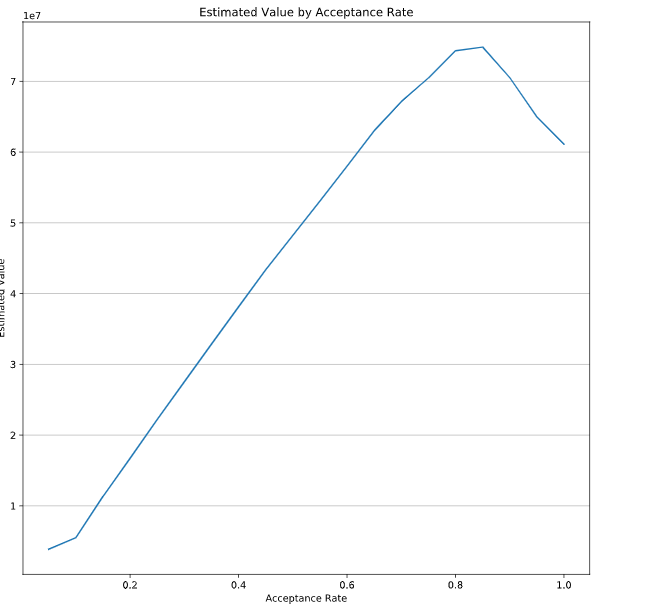

In [137]:
from IPython.display import Image
Image(filename='line_plot.PNG')

In [0]:
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])



```
 Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  Estimated Value
3             0.85      0.804     0.083                9390        9556.28      74837713.31

```



Interesting! With our credit data and our estimated averag loan value, we clearly see that the acceptance rate 0.85 has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options.

### Total expected loss


![alt text](https://assets.datacamp.com/production/repositories/4876/datasets/400c5af283154c39409e96b06dbdbb715a242859/4_10_tot_calc.PNG)

For this case, we will assume that the exposure (EAD) is the full value of the loan, and the loss given default(LGD) is 100%. where PD = Probability of default

In [0]:
# Print the first five rows of the data frame
print(test_pred_df.head())

# Calculate the bank's expected loss and assign it to a new column
test_pred_df["expected_loss"] = test_pred_df["prob_default"] * test_pred_df["loss_given_default"] * test_pred_df["loan_amnt"]

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df["expected_loss"]),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))



```
   true_loan_status  prob_default  loan_amnt  loss_given_default
0                 1      0.982387      15000                 1.0
1                 1      0.975163      11200                 1.0
2                 0      0.003474      15000                 1.0
3                 0      0.005457      10800                 1.0
4                 1      0.119876       3000                 1.0
Total expected loss:  $27,084,153.38
```



This is the total expected loss for the entire portfolio using the gradient boosted tree. 27 million dollars may seem like a lot, but the total expected loss would have been over $28 million with the logistic regression. Some losses are unavoidable, but your work here might have saved the company a million dollars!